In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import os
import tarfile
import urllib

In [2]:
startups = pd.read_csv(r"C:\Users\catal\Zealand\SEMESTERS\4TH SEMESTER\Machine Learning\Datasets\50_Startups.csv")

In [3]:
df = pd.DataFrame(startups)

In [4]:
print(df.head(50))

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [5]:
startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
startups["State"].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [7]:
df = pd.DataFrame(startups)
corr = df.corr()
corr

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


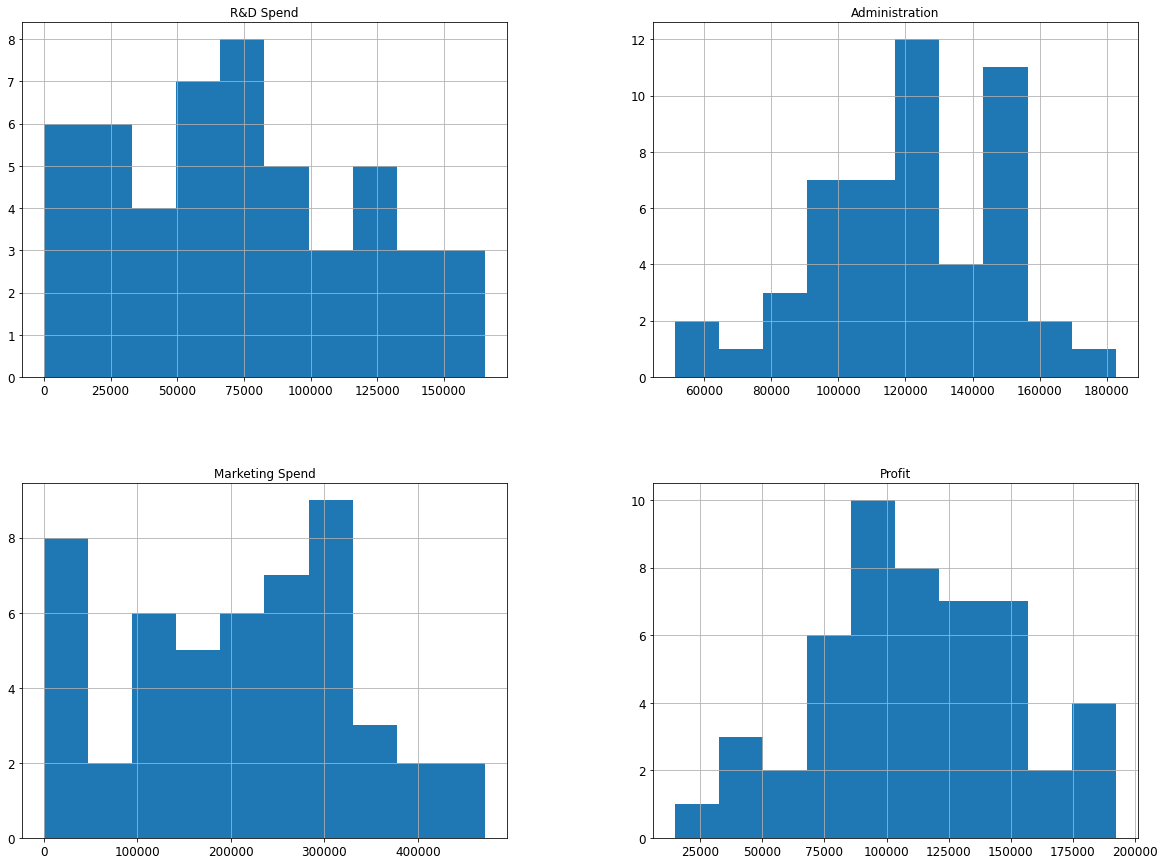

In [8]:

startups.hist(bins=10, figsize=(20,15))
plt.show()


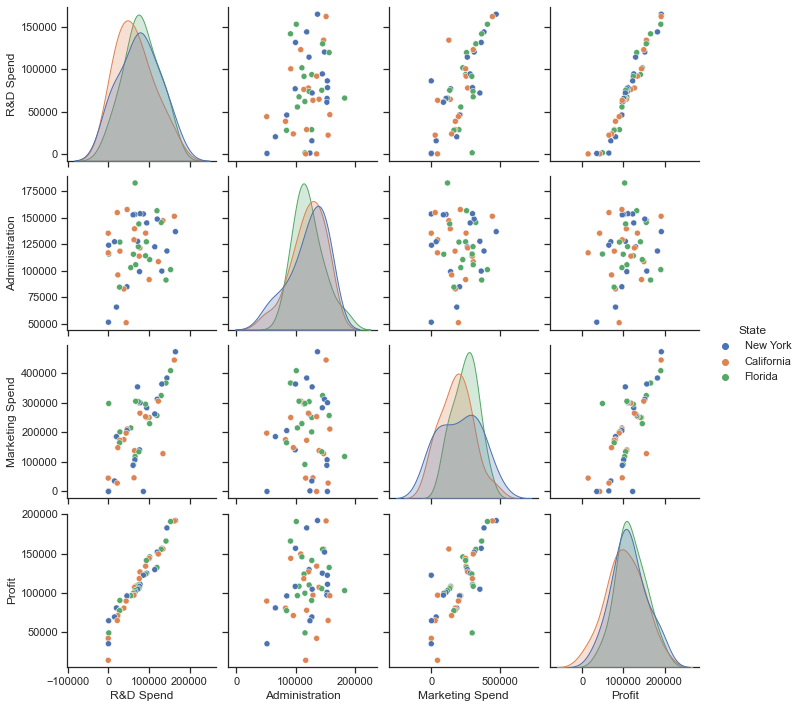

In [9]:
from pandas.plotting import scatter_matrix

sns.set_theme(style="ticks")
sns.pairplot(startups, hue="State")

In [10]:
#startups["Total Spend"] = startups["Administration"]+startups["R&D Spend"]+startups["Marketing Spend"]
#startups["Capital"] = startups["Total Spend"]+startups["Profit"]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Profit', ylabel='Marketing Spend'>

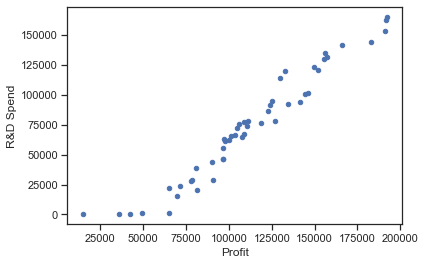

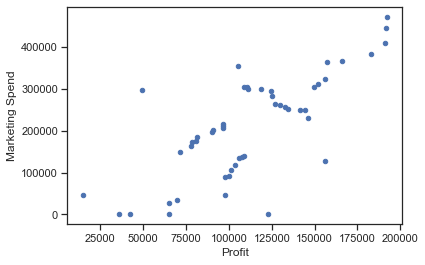

In [11]:
startups.plot(kind="scatter", x="Profit", y="R&D Spend")
startups.plot(kind="scatter", x="Profit", y="Marketing Spend")

In [12]:
np.random.seed(42)

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [14]:
df = startups
df.State = le.fit_transform(df.State)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [15]:
ct = ColumnTransformer([('State', OneHotEncoder(), [3])], remainder = 'passthrough')
x = df.drop('Profit', axis = 'columns')

In [16]:
y = df.Profit

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8,random_state=0)
y_train

33     96778.92
35     96479.51
26    105733.54
34     96712.80
18    124266.90
7     155752.60
14    132602.65
45     64926.08
48     35673.41
29    101004.64
15    129917.04
30     99937.59
32     97427.84
16    126992.93
42     71498.49
20    118474.03
43     69758.98
8     152211.77
13    134307.35
25    107404.34
5     156991.12
17    125370.37
40     78239.91
49     14681.40
1     191792.06
12    141585.52
37     89949.14
24    108552.04
6     156122.51
23    108733.99
36     90708.19
21    111313.02
19    122776.86
9     149759.96
39     81005.76
46     49490.75
3     182901.99
0     192261.83
47     42559.73
44     65200.33
Name: Profit, dtype: float64

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
regressor = LinearRegression() # Regression object created
regressor.fit(X_train,y_train) # Training model

LinearRegression()

In [30]:
y_pred = regressor.predict(X_test) # predicting 
y_pred

array([103959.40508021, 132398.73236694, 133529.03790148,  72958.28368314,
       179534.78737166, 115533.62584099,  67476.95847883,  98504.36199396,
       114789.16083781, 168972.21909945])

In [31]:
testing_data_model_score = regressor.score(X_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

training_data_model_score = regressor.score(X_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Testing data 0.9386861070938134
Model Score/Performance on Training data 0.9500009880362248


In [32]:
dfPredict = pd.DataFrame(data={'Predicted value':y_pred,'Actual Value':y_test})
dfPredict


,Predicted value,Actual Value
28,103959.405080,103282.38
11,132398.732367,144259.40
10,133529.037901,146121.95
41,72958.283683,77798.83
2,179534.787372,191050.39
27,115533.625841,105008.31
38,67476.958479,81229.06
31,98504.361994,97483.56
22,114789.160838,110352.25
4,168972.219099,166187.94
